In [1]:
import pandas as pd
import numpy as np

Посмотрим, в каком формате я создал данные. Откроем 1 из файлов, в котором лежат различные смеси при разных условиях (температура, давление) при $0\%$ воздуха в смеси

In [2]:
df = pd.read_csv(f"data/data-air-ratio-0.0.csv", header=None)
df

C:\Users\whoee\AppData\Local\Temp\ipykernel_15100\3003547762.py:1: DtypeWarning: Columns (1003,1004) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/data-air-ratio-0.0.csv", header=None)


,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007
0,1.115382e-22,1.132894e-22,1.154786e-22,1.184278e-22,1.228643e-22,1.307593e-22,1.492969e-22,2.239129e-22,4.980730e-22,4.617947e-22,...,1.824238e-21,1.745592e-21,1.673961e-21,H2O,NaN,NaN,NaN,253.0,0.1,0.0
1,1.023310e-22,1.039533e-22,1.059903e-22,1.087488e-22,1.129230e-22,1.204026e-22,1.381609e-22,2.125197e-22,4.864893e-22,4.490028e-22,...,1.763220e-21,1.685080e-21,1.614050e-21,H2O,NaN,NaN,NaN,263.0,0.1,0.0
2,9.416257e-23,9.566855e-23,9.756743e-23,1.001510e-22,1.040820e-22,1.111723e-22,1.281951e-22,2.026144e-22,4.752066e-22,4.366145e-22,...,1.705168e-21,1.627626e-21,1.557274e-21,H2O,NaN,NaN,NaN,273.0,0.1,0.0
3,8.687743e-23,8.827801e-23,9.005075e-23,9.247345e-23,9.617861e-23,1.029040e-22,1.192350e-22,1.940303e-22,4.641979e-22,4.245896e-22,...,1.649577e-21,1.572740e-21,1.503157e-21,H2O,NaN,NaN,NaN,283.0,0.1,0.0
4,8.035656e-23,8.166220e-23,8.332084e-23,8.559731e-23,8.909601e-23,9.548544e-23,1.111755e-22,1.866200e-22,4.538845e-22,4.132638e-22,...,1.596059e-21,1.520027e-21,1.451296e-21,H2O,NaN,NaN,NaN,293.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,3.718719e-21,3.213366e-21,1.995113e-21,1.247858e-21,9.020230e-22,7.387531e-22,6.670500e-22,6.660430e-22,7.687305e-22,9.249001e-22,...,1.979035e-20,1.648403e-20,1.409396e-20,H2S,OH,N2O,CO,283.0,1.0,0.0
12956,3.547092e-21,3.044521e-21,1.862054e-21,1.153659e-21,8.315437e-22,6.808313e-22,6.150972e-22,6.151836e-22,7.146396e-22,8.705069e-22,...,1.946054e-20,1.615809e-20,1.378000e-20,H2S,OH,N2O,CO,293.0,1.0,0.0
12957,3.386370e-21,2.887207e-21,1.740022e-21,1.068346e-21,7.680618e-22,6.287514e-22,5.683869e-22,5.693779e-22,6.656150e-22,8.209643e-22,...,1.911150e-20,1.581741e-20,1.345576e-20,H2S,OH,N2O,CO,303.0,1.0,0.0
12958,3.235684e-21,2.740471e-21,1.627935e-21,9.909259e-22,7.107414e-22,5.817973e-22,5.262719e-22,5.280082e-22,6.210607e-22,7.757012e-22,...,1.874961e-20,1.546664e-20,1.312479e-20,H2S,OH,N2O,CO,313.0,1.0,0.0


Видим, что колонки с 0 по 1000 включительно содержат коэффициенты поглощения на различных длинах волн. Колонки с 1001 по 1004 содержат газы, находящиеся в смеси. 1005 колонка содержит температуру смеси, 1006 - давление, а 1007 - процентное содержание воздуха.

Теперь загрузим все данные и объединим их, попутно переименовывая колонки, чтобы было проще по ним ориентироваться

In [3]:
# загрузим данные 
dfs = []
for i in range(10):
    df = pd.read_csv(f"data/data-air-ratio-0.{i}.csv", header=None)
    df.rename(
        columns={
            1001: "element_1",
            1002: "element_2",
            1003: "element_3",
            1004: "element_4",
            1005: "temp",
            1006: "pressure",
            1007: "air_ratio",
        },
        inplace=True,
    )
    dfs.append(df)
# объединим и посмотрим, что получилось
data = pd.concat(dfs)
data

C:\Users\whoee\AppData\Local\Temp\ipykernel_15100\713874816.py:4: DtypeWarning: Columns (1003,1004) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/data-air-ratio-0.{i}.csv", header=None)
C:\Users\whoee\AppData\Local\Temp\ipykernel_15100\713874816.py:4: DtypeWarning: Columns (1003,1004) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/data-air-ratio-0.{i}.csv", header=None)
C:\Users\whoee\AppData\Local\Temp\ipykernel_15100\713874816.py:4: DtypeWarning: Columns (1003,1004) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/data-air-ratio-0.{i}.csv", header=None)
C:\Users\whoee\AppData\Local\Temp\ipykernel_15100\713874816.py:4: DtypeWarning: Columns (1003,1004) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"data/data-air-ratio-0.{i}.csv", header=None)
C:\Users\whoee\AppData\Local\Temp\ipyker

,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,element_1,element_2,element_3,element_4,temp,pressure,air_ratio
0,1.115382e-22,1.132894e-22,1.154786e-22,1.184278e-22,1.228643e-22,1.307593e-22,1.492969e-22,2.239129e-22,4.980730e-22,4.617947e-22,...,1.824238e-21,1.745592e-21,1.673961e-21,H2O,NaN,NaN,NaN,253.0,0.1,0.0
1,1.023310e-22,1.039533e-22,1.059903e-22,1.087488e-22,1.129230e-22,1.204026e-22,1.381609e-22,2.125197e-22,4.864893e-22,4.490028e-22,...,1.763220e-21,1.685080e-21,1.614050e-21,H2O,NaN,NaN,NaN,263.0,0.1,0.0
2,9.416257e-23,9.566855e-23,9.756743e-23,1.001510e-22,1.040820e-22,1.111723e-22,1.281951e-22,2.026144e-22,4.752066e-22,4.366145e-22,...,1.705168e-21,1.627626e-21,1.557274e-21,H2O,NaN,NaN,NaN,273.0,0.1,0.0
3,8.687743e-23,8.827801e-23,9.005075e-23,9.247345e-23,9.617861e-23,1.029040e-22,1.192350e-22,1.940303e-22,4.641979e-22,4.245896e-22,...,1.649577e-21,1.572740e-21,1.503157e-21,H2O,NaN,NaN,NaN,283.0,0.1,0.0
4,8.035656e-23,8.166220e-23,8.332084e-23,8.559731e-23,8.909601e-23,9.548544e-23,1.111755e-22,1.866200e-22,4.538845e-22,4.132638e-22,...,1.596059e-21,1.520027e-21,1.451296e-21,H2O,NaN,NaN,NaN,293.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,5.289012e-21,3.756070e-21,1.659088e-21,8.304214e-22,5.428177e-22,4.235728e-22,3.757332e-22,3.865526e-22,5.109022e-22,7.546299e-22,...,9.451616e-21,7.650499e-21,6.442794e-21,H2S,OH,N2O,CO,283.0,1.0,0.9
12956,5.050405e-21,3.545328e-21,1.536282e-21,7.630333e-22,4.983417e-22,3.892165e-22,3.456123e-22,3.563738e-22,4.753762e-22,7.167486e-22,...,9.333243e-21,7.511888e-21,6.308944e-21,H2S,OH,N2O,CO,293.0,1.0,0.9
12957,4.826675e-21,3.350160e-21,1.424719e-21,7.025138e-22,4.585066e-22,3.584483e-22,3.186145e-22,3.292518e-22,4.431326e-22,6.819514e-22,...,9.207847e-21,7.365421e-21,6.169023e-21,H2S,OH,N2O,CO,303.0,1.0,0.9
12958,4.616679e-21,3.169202e-21,1.323184e-21,6.480254e-22,4.227258e-22,3.308098e-22,2.943416e-22,3.048041e-22,4.137890e-22,6.498878e-22,...,9.078390e-21,7.213415e-21,6.024868e-21,H2S,OH,N2O,CO,313.0,1.0,0.9


Объединили данные. Теперь проверим, что данные корректные. Нарисуем спектры и посмотрим, что получается. Для примера, возьмём H2O и посмотрим, как изменяется спектр при различных параметрах

In [19]:
from typing import List, Tuple
import matplotlib.pyplot as plt


def plot_spectras(
    spectras: List[Tuple[List[float], float]],
    param: str,
    width: float = 1,
) -> None:
    plt.figure(figsize=(15, 8))
    for spectra, param_value in spectras:
        plt.plot(spectra, label=f"{param}: {param_value}", linewidth=width)
    
    plt.xlabel("WN")
    plt.ylabel("abs. coef")

    plt.legend()
    plt.show()

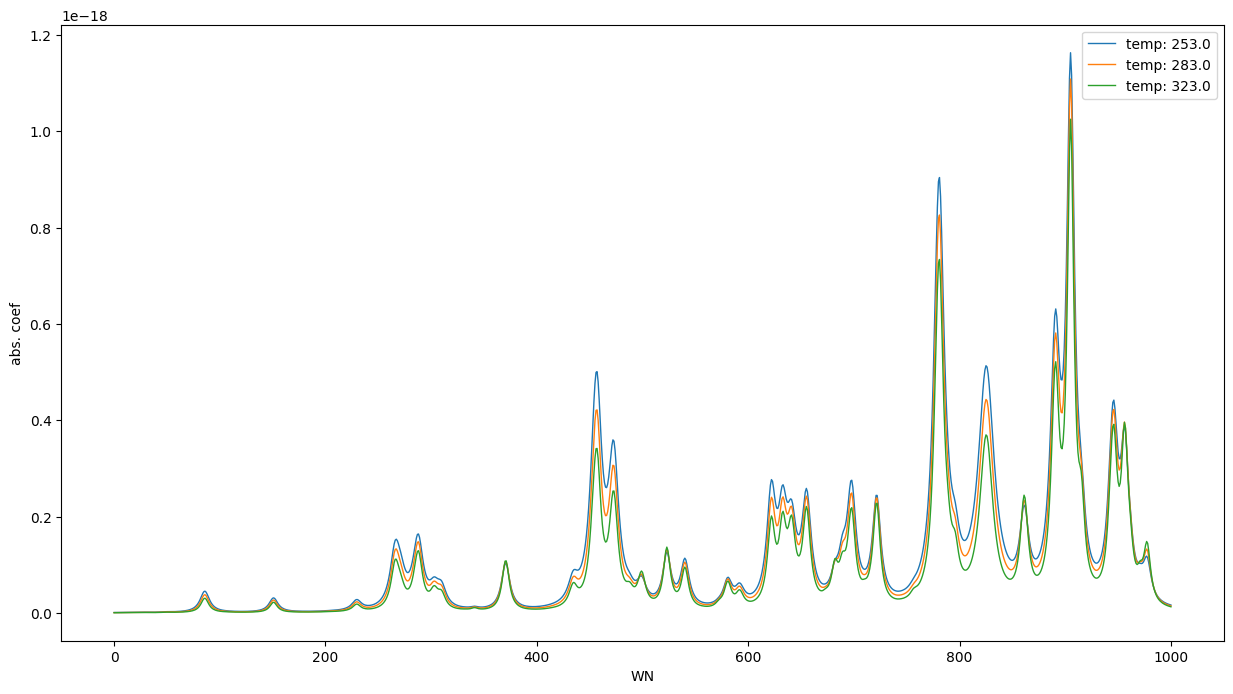

In [20]:
# посмотрим, на то, как меняется спектр в зависимости от температуры
spectras = []
temps = [253.0, 283.0, 323.0]
for temp in temps:
    spectras.append(
        (
            data[
                (data.element_1 == "H2O")
                & (data.element_2.isnull())
                & (data.element_3.isnull())
                & (data.element_4.isnull())
                & (data.temp == temp)
                & (data.pressure == 1)
                & (data.air_ratio == 0)
            ].to_numpy()[:, :1001].tolist()[0],
            
            temp
        )
    )

plot_spectras(spectras, "temp")

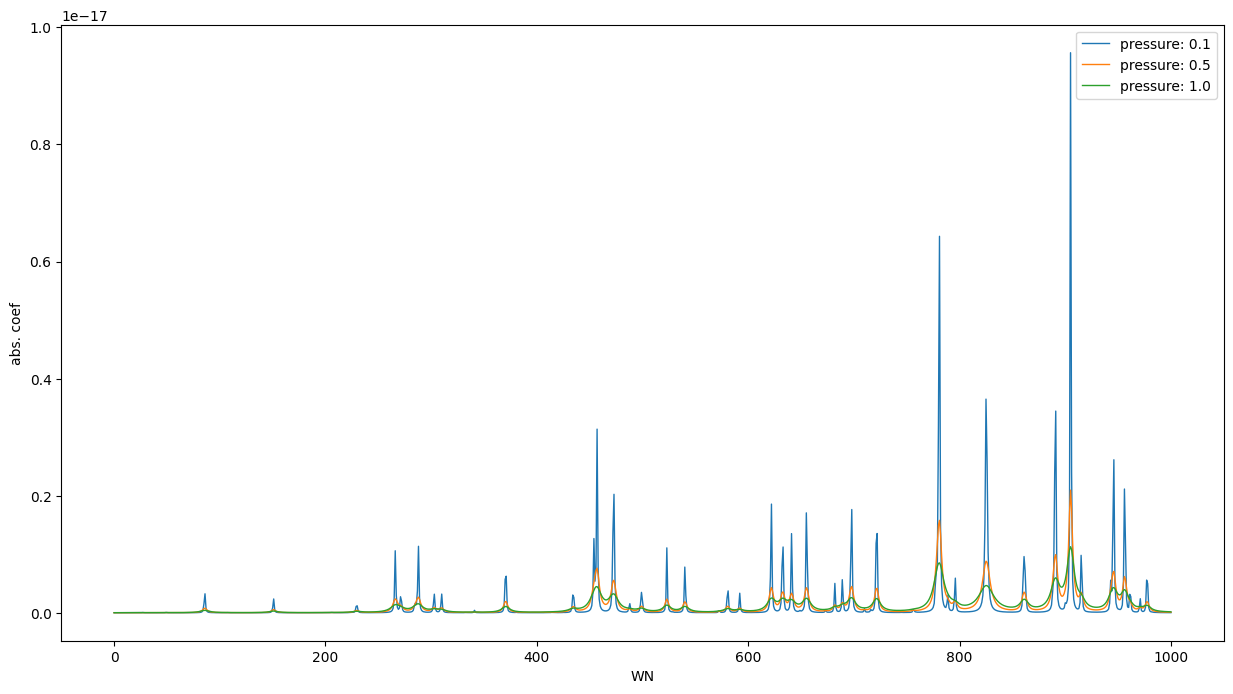

In [21]:
# а теперь при различных давлениях
spectras = []
pressures = [0.1, 0.5, 1.0]
for p in pressures:
    spectras.append(
        (
            data[
                (data.element_1 == "H2O")
                & (data.element_2.isnull())
                & (data.element_3.isnull())
                & (data.element_4.isnull())
                & (data.temp == 273)
                & (data.pressure == p)
                & (data.air_ratio == 0)
            ]
            .to_numpy()[:, :1001]
            .tolist()[0],
            p,
        )
    )

plot_spectras(spectras, "pressure")

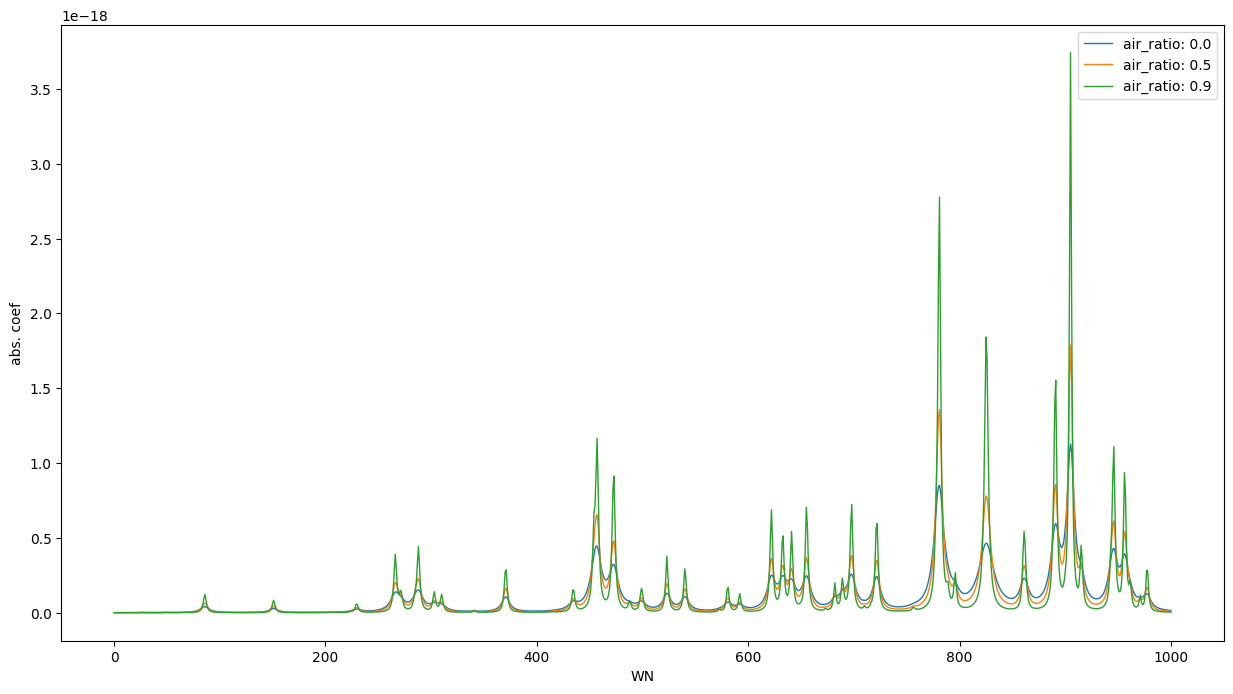

In [22]:
# ну и при различном кол-ве воздуха в смеси
spectras = []
air_ratios = [0.0, 0.5, 0.9]
for ar in air_ratios:
    spectras.append(
        (
            data[
                (data.element_1 == "H2O")
                & (data.element_2.isnull())
                & (data.element_3.isnull())
                & (data.element_4.isnull())
                & (data.temp == 273)
                & (data.pressure == 1)
                & (data.air_ratio == ar)
            ]
            .to_numpy()[:, :1001]
            .tolist()[0],
            ar,
        )
    )

plot_spectras(spectras, "air_ratio")

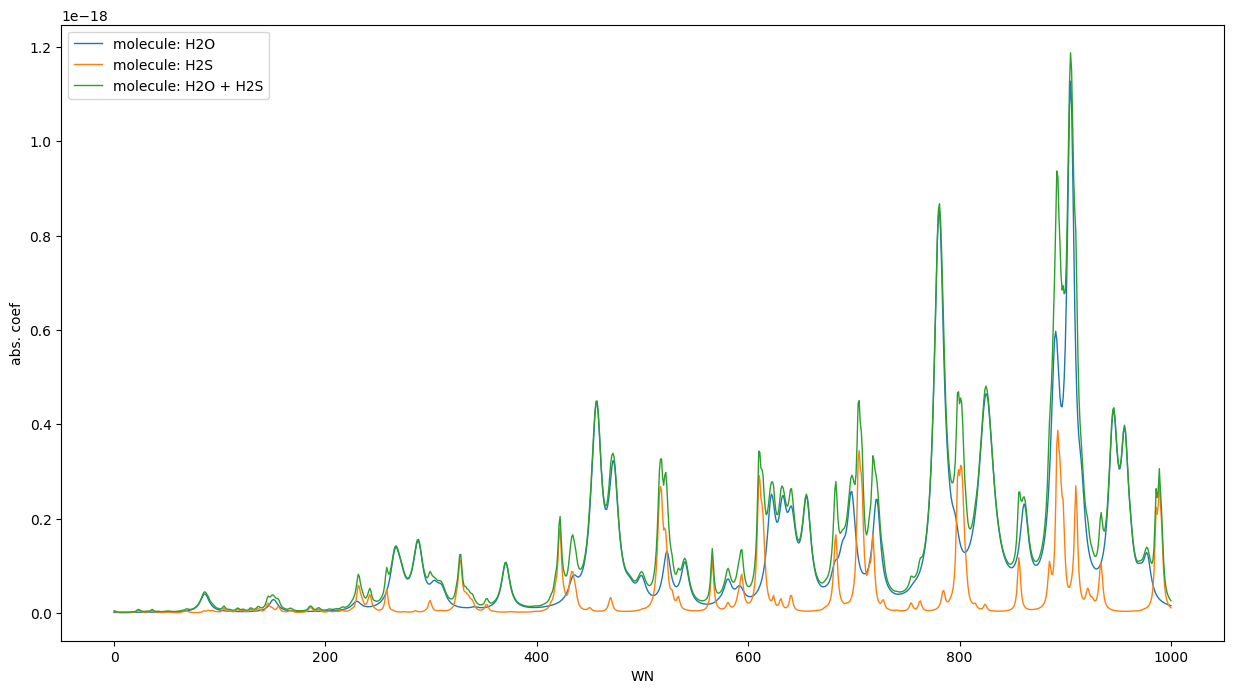

In [23]:
# можем еще посмотреть, как выглядят смеси веществ. Возьмем H2O и H2S
spectras = []

spectras.append(    # только H2O
    (
        data[
            (data.element_1 == "H2O")
            & (data.element_2.isnull())
            & (data.element_3.isnull())
            & (data.element_4.isnull())
            & (data.temp == 273)
            & (data.pressure == 1)
            & (data.air_ratio == 0)
        ]
        .to_numpy()[:, :1001]
        .tolist()[0],
        "H2O",
    )
)

spectras.append(  # только H2S
    (
        data[
            (data.element_1 == "H2S")
            & (data.element_2.isnull())
            & (data.element_3.isnull())
            & (data.element_4.isnull())
            & (data.temp == 273)
            & (data.pressure == 1)
            & (data.air_ratio == 0)
        ]
        .to_numpy()[:, :1001]
        .tolist()[0],
        "H2S",
    )
)

spectras.append(  # H2O + H2S
    (
        data[
            (data.element_1 == "H2O")
            & (data.element_2 == "H2S")
            & (data.element_3.isnull())
            & (data.element_4.isnull())
            & (data.temp == 273)
            & (data.pressure == 1)
            & (data.air_ratio == 0)
        ]
        .to_numpy()[:, :1001]
        .tolist()[0],
        "H2O + H2S",
    )
)

plot_spectras(spectras, "molecule")

Как видим, спектры действительно разные. Теперь займемся классификацией. Для примера, сделаем классификатор для определения наличия H2O в смеси

In [24]:
# подготовим датасет - добавим целевую переменную,
# которая равна 1 если в смеси есть искомый элемент и 0 в противном случае

element_df = data.copy()
element = "H2O"

condition = (
    (element_df.element_1 == element)
    | (element_df.element_2 == element)
    | (element_df.element_3 == element)
    | (element_df.element_4 == element)
)

element_df["is_target_present"] = np.where(condition, 1, 0)             # создал столбец с таргетом
element_df[list(range(1001))] = np.log(element_df[list(range(1001))])   # прологарифмировал коэф. поглощения

# получили итоговый датасет для обучения
# новая колонка - крайняя справа
element_df

,0,1,2,3,4,5,6,7,8,9,...,999,1000,element_1,element_2,element_3,element_4,temp,pressure,air_ratio,is_target_present
0,-50.547675,-50.532097,-50.512957,-50.487739,-50.450962,-50.388684,-50.256105,-49.850785,-49.051296,-49.126922,...,-47.797193,-47.839094,H2O,NaN,NaN,NaN,253.0,0.1,0.0,1
1,-50.633829,-50.618101,-50.598694,-50.573002,-50.535336,-50.471201,-50.333623,-49.903008,-49.074827,-49.155013,...,-47.832474,-47.875540,H2O,NaN,NaN,NaN,263.0,0.1,0.0,1
2,-50.717020,-50.701153,-50.681498,-50.655363,-50.616863,-50.550961,-50.408489,-49.950737,-49.098292,-49.182992,...,-47.867164,-47.911350,H2O,NaN,NaN,NaN,273.0,0.1,0.0,1
3,-50.797544,-50.781551,-50.761669,-50.735121,-50.695835,-50.628245,-50.480946,-49.994028,-49.121731,-49.210919,...,-47.901467,-47.946720,H2O,NaN,NaN,NaN,283.0,0.1,0.0,1
4,-50.875568,-50.859451,-50.839343,-50.812388,-50.772328,-50.703068,-50.550932,-50.032968,-49.144199,-49.237956,...,-47.935559,-47.981830,H2O,NaN,NaN,NaN,293.0,0.1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,-46.688656,-47.030914,-47.848019,-48.540109,-48.965269,-49.213317,-49.333163,-49.304774,-49.025864,-48.635815,...,-46.319516,-46.491325,H2S,OH,N2O,CO,283.0,1.0,0.9,0
12956,-46.734818,-47.088656,-47.924922,-48.624741,-49.050756,-49.297906,-49.416725,-49.386062,-49.097936,-48.687317,...,-46.337800,-46.512319,H2S,OH,N2O,CO,293.0,1.0,0.9,0
12957,-46.780129,-47.145279,-48.000312,-48.707377,-49.134067,-49.380258,-49.498060,-49.465219,-49.168173,-48.737084,...,-46.357491,-46.534746,H2S,OH,N2O,CO,303.0,1.0,0.9,0
12958,-46.824611,-47.200807,-48.074246,-48.788112,-49.215318,-49.460499,-49.577301,-49.542373,-49.236686,-48.785243,...,-46.378345,-46.558391,H2S,OH,N2O,CO,313.0,1.0,0.9,0


In [26]:
# посмотрим, какую долю составляют смеси с наличием в них элемента
# это число я и взял как вероятность случайно угадать наличие элемента в смеси

print(f"{element}: {element_df[element_df.is_target_present == 1].shape[0] / element_df.shape[0] * 100 :.2f}%")

H2O: 39.51%


Подготовили датасет. Осталось лишь обучить классификатор и посмотреть на результаты:

In [41]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# берём за X столбцы с 0 по 1000 включительно
# за y - новый столбец с таргетом
X_train, X_test, y_train, y_test = train_test_split(
    element_df[list(range(1001))],  # X
    element_df.is_target_present,   # y
    test_size=0.9,    # размер тестовой выборки. Взял сильно меньше 70%, но, как оказывается, и этого достаточно
    random_state=42,
)

# проверим, что таргет не просочился в X:
X_train

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
5128,-48.370390,-48.155128,-50.700807,-51.221016,-51.349933,-51.357638,-51.272382,-50.988977,-49.546954,-47.503269,...,-47.565478,-48.401775,-48.726001,-48.851423,-48.905648,-48.912636,-48.844387,-48.516650,-47.418189,-47.784609
4065,-49.453542,-49.440211,-49.424159,-49.403617,-49.375006,-49.330291,-49.249948,-49.101035,-48.945225,-48.955965,...,-46.118315,-46.281854,-46.389199,-46.463969,-46.521542,-46.565768,-46.591313,-46.569875,-46.490863,-46.565113
1921,-47.746164,-47.504194,-51.977268,-53.054529,-53.470907,-53.511909,-53.232342,-52.529050,-49.303390,-46.816003,...,-59.043861,-56.157490,-55.727477,-58.550548,-58.653201,-57.092809,-56.593185,-56.871921,-57.471686,-60.088882
4149,-46.878222,-47.139728,-47.700995,-48.114956,-48.326536,-48.427331,-48.468199,-48.475883,-48.473552,-48.476512,...,-42.745496,-43.158947,-43.775809,-44.282203,-44.632983,-44.880239,-45.062268,-45.227527,-45.365248,-45.477592
5887,-50.201004,-50.198349,-50.195654,-50.192904,-50.190071,-50.187142,-50.184094,-50.180863,-50.177445,-50.173828,...,-46.478662,-46.661532,-46.824005,-46.930290,-46.986885,-46.997814,-46.952218,-46.835234,-46.724495,-46.780045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11466,-45.860465,-46.634849,-48.372874,-49.277188,-49.755241,-50.011804,-50.151851,-50.093600,-49.439142,-48.080310,...,-41.954246,-43.164841,-44.834247,-45.647493,-46.145418,-46.474362,-46.547193,-46.983768,-47.212268,-47.383922
14,-51.355981,-51.339577,-51.318973,-51.291104,-51.249177,-51.175365,-51.006811,-50.258512,-48.995798,-49.136179,...,-47.827110,-47.794228,-47.783454,-48.047060,-48.125764,-48.189204,-48.246957,-48.300802,-48.351488,-48.399474
860,-48.578605,-48.567333,-48.554601,-48.539965,-48.522918,-48.503109,-48.481046,-48.459394,-48.442627,-48.433467,...,-45.192271,-45.268488,-45.341419,-45.407287,-45.465018,-45.514269,-45.554574,-45.587032,-45.619297,-45.662198
2835,-49.323376,-49.157321,-50.581952,-51.495524,-51.867326,-51.895852,-51.632792,-51.008349,-49.843416,-48.601783,...,-56.797199,-56.831528,-56.862733,-56.891222,-56.917338,-56.941353,-56.963436,-56.982679,-56.988061,-57.020533


In [68]:
# проверим, что тут лежат только типы float
X_train.dtypes[X_train.dtypes == np.float64].all()

True

In [77]:
# проверим, что все они лежат в адекватном диапазоне
((-67 < X_train) & (X_train < -37) ).all().all()

True

In [28]:
y_train

5128     0
4065     1
1921     0
4149     1
5887     0
        ..
11466    0
14       1
860      1
2835     0
5318     0
Name: is_target_present, Length: 12960, dtype: int32

In [36]:
# собственно, сама модель.

clf = make_pipeline(StandardScaler(), LinearSVC(dual="auto", random_state=42, tol=1e-5))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_pred) * 100 :.2f}%")

accuracy: 100.00%


In [33]:
# на всякий случай, проверю сам, вдруг функция accuracy_score дала сбой?
np.where(y_pred != y_test)

(array([], dtype=int64),)

:(